##  Ejercicio evaluación módulo 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

pd.set_option('display.max_columns', None) 

In [2]:
df_activity = pd.read_csv("files/Customer Flight Activity.csv")
df_history = pd.read_csv("files/Customer Loyalty History.csv")

### Fase 1: Exploración y Limpieza
 
1. **Exploración Inicial:**

   - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

   - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

   - Une los dos conjuntos de datos de la forma más eficiente. 

In [3]:
df_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
df_u = pd.merge(df_activity, df_history, on='Loyalty Number', how='left')

# He utilizado un 'merge' con el argumento 'left' porque quiero preservar todos los datos de mis tablas

In [6]:
df_u.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [7]:
df_u.shape

(405624, 25)

In [8]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

    - Con este primer análisis observo qué tipo de datos tienen las columnas

In [9]:
df_u.dtypes
## también puedo ver el tipo de dato con este atributo, pero el info es mas completo porque me da mas información

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [10]:
df_u.isna().sum() 

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

    - Este primer análisis me dice que tenemos nulos en: Salary, Cancellation Year y Cancellation Month 

In [11]:
df_u.duplicated() == True

0         False
1         False
2         False
3         False
4         False
          ...  
405619    False
405620    False
405621    False
405622    False
405623    False
Length: 405624, dtype: bool

In [12]:
df_u.describe(include='O').T 
#para ver solo las categóricas

,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


In [13]:
df_u.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


In [14]:
df_u.columns = df_u.columns.str.lower() 
#aqui decidí poner las columnas en minusculas 

### Resumen de análisis


1. Salary: 

    - Nulos: Faltan 102,672 datos de salario. Esto es más del 25% de tu base de datos. Imputar con la media o mediana.

    - Datos Erróneos: El valor mínimo (min) es -58,486.00, un salario no puede ser negativo. Esto es un error de entrada de datos que debe ser limpiado (probablemante convertir a positivo)

2. Cancellation:

Las columnas Cancellation Year y Cancellation Month tienen un count de solo 50,064, faltan 355,560 registros. Esto indica que la gran mayoría de tus clientes (los que tienen NaN aquí) siguen activos y no han cancelado. Aquí entendemos un nulo como un cliente activo.

3. Outliers: 


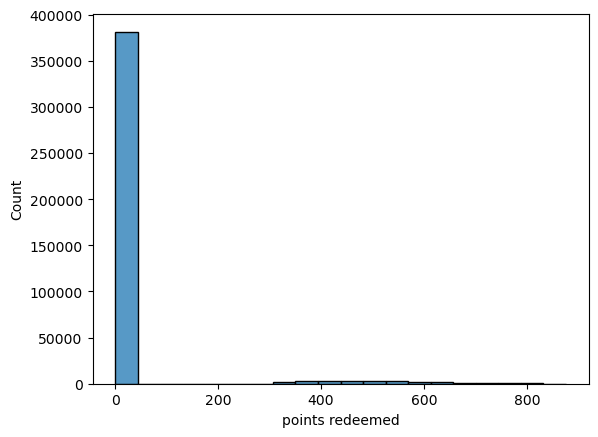

In [15]:
sns.histplot(data=df_u, x= 'points redeemed');

    - Points Redeemed: El 75% de la gente tiene 0 canjes. El máximo es 876.

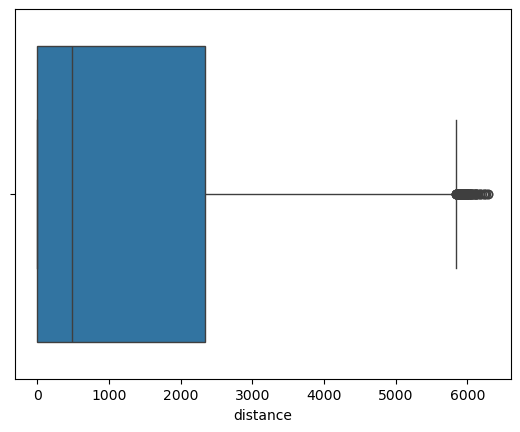

In [16]:
sns.boxplot(data=df_u, x= 'distance');

        - Distance: El 75% viaja hasta 2,336 km, pero hay alguien que viajó 6,293 km (casi el triple)
    

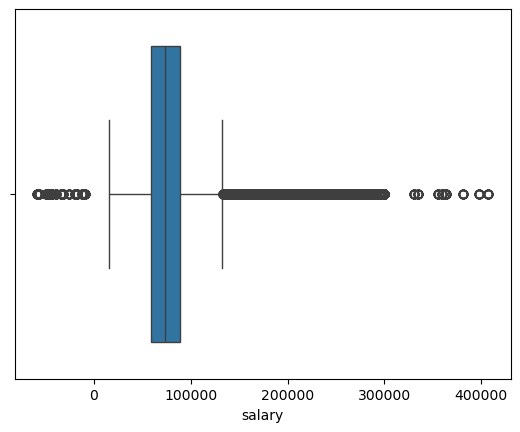

In [17]:
sns.boxplot(data=df_u, x= 'salary');

    - Salary: El salario máximo (407,228) es muy superior al 75% (88,612), lo que indica una gran disparidad de ingresos.

______________________________________________________________________________________________________________________________________________________________________


2. **Limpieza de Datos:**

   - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
   - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
   - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

## Columna 'Salary'

In [18]:
df_u['salary'].unique()

array([92552.,    nan, 63253., ..., 23160., 97206., 56345.])

In [19]:
df_u['salary'] = df_u['salary'].abs()
# convierto salary en absoluto por los negativos

In [20]:
mask = df_u['salary'] <= 0

In [21]:
df_u[mask]

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month


 ### - Outliers

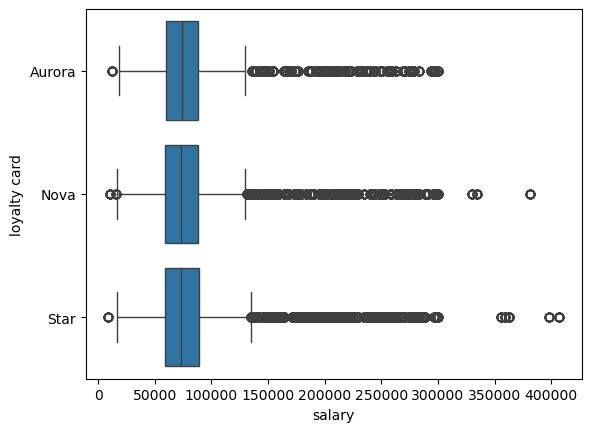

In [22]:
sns.boxplot(data=df_u, y='loyalty card', x='salary');

El gráfico confirma que, el salario no es un diferenciador significativo entre las categorías de tarjetas Aurora, Nova y Star y que la columna 'Salary' está muy sesgada y tiene outliers, pero estos outliers (clientes de ingresos extremadamente altos) son parte de todas las categorías de lealtad y, por lo tanto, son datos válidos que deben conservarse.

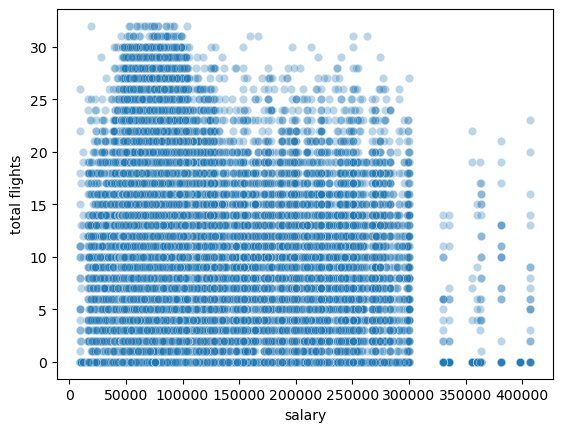

In [23]:
sns.scatterplot(data=df_u, x='salary', y='total flights', alpha=0.3);

Los clientes que tienen salarios medios, son los que vuelan mas, lo que sugiere que los clientes de muy altos ingresos podrían estar utilizando servicios privados (por ejemplo), mientras que el programa de lealtad está dominado por viajeros frecuentes que priorizan la acumulación de puntos.

### - Nulos

    - Se ha decidido imputar los valores faltantes en la columna 'Salary' utilizando la mediana en vez de la media. Por más que no tengan una diferencia abismal, usamos la mediana porque es más robusta y suficiente para el objetivo de segmentación de clientes.

In [24]:
df_u['salary'].describe().T.reset_index()

,index,salary
0,count,302952.000000
1,mean,79381.440228
2,std,34735.904533
3,min,9081.000000
4,25%,59262.000000
5,50%,73479.000000
6,75%,88612.000000
7,max,407228.000000


In [39]:
mediana_salario = df_u['salary'].median()

df_u['salary'].fillna(mediana_salario, inplace=True)

print(f"Mediana utilizada para la imputación: {mediana_salario}")
print(f"Verificación: Nulos restantes en 'Salary' (debe ser 0): {df_u['salary'].isna().sum()}")

Mediana utilizada para la imputación: 73479.0
Verificación: Nulos restantes en 'Salary' (debe ser 0): 0


## - Columnas Cancellation (year and month)

    - Convierto los valores a object
    - Imputacion logica: Agrego una columna que diga el estado del cliente ('activo', 'cancelado') basado en los nulos de year

In [ ]:
df_u['cancellation month'].unique()

array([nan,  3.,  9.,  2.,  7.,  6.,  8.,  4.,  1.,  5., 11., 12., 10.])

In [ ]:
df_u['cancellation year'].unique()

array([  nan, 2018., 2015., 2016., 2014., 2013., 2017.])

In [26]:
columnas_a_int = ['cancellation month', 'cancellation year']

In [28]:
df_u[columnas_a_int] = df_u[columnas_a_int].astype('Int64')

print(f"Las columnas {columnas_a_int} han sido convertidas a tipo Int.")

Las columnas ['cancellation month', 'cancellation year'] han sido convertidas a tipo Int.


In [29]:
df_u[['cancellation month', 'cancellation year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   cancellation month  50064 non-null  Int64
 1   cancellation year   50064 non-null  Int64
dtypes: Int64(2)
memory usage: 7.0 MB


In [30]:
df_u['cancellation year'].unique()

<IntegerArray>
[<NA>, 2018, 2015, 2016, 2014, 2013, 2017]
Length: 7, dtype: Int64

In [31]:
df_u['cancellation month'].unique()

<IntegerArray>
[<NA>, 3, 9, 2, 7, 6, 8, 4, 1, 5, 11, 12, 10]
Length: 13, dtype: Int64

In [36]:
df_u[df_u['cancellation month'].notna()].head(10)

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
9,100504,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018,3
37,100504,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018,3
39,100504,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018,3
65,103352,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,69742.0,Married,Aurora,5555.49,Standard,2014,11,2015,9
68,103383,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Kingston,M9K 2P4,Male,Doctor,65018.0,Married,Aurora,13466.92,Standard,2015,6,2016,2
88,100504,2017,4,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018,3
92,104739,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,High School or Below,65565.0,Married,Nova,5498.94,Standard,2013,11,2014,7
101,100504,2017,5,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018,3
103,105352,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Female,College,73479.0,Single,Star,3923.27,Standard,2014,1,2014,6
106,105700,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,73479.0,Single,Nova,7944.97,Standard,2013,8,2015,8


In [37]:
df_u['loyalty state'] = np.where(df_u['cancellation year'].isna(), 'active','cancel')


print("Distribución después de la imputación lógica:")
print(df_u['loyalty state'].value_counts())

Distribución después de la imputación lógica:
loyalty state
active    355560
cancel     50064
Name: count, dtype: int64


In [46]:
df_u[df_u['loyalty state'] == 'cancel'].head()

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,loyalty state
9,100504,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018,3,cancel
37,100504,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018,3,cancel
39,100504,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2017,7,2018,3,cancel
65,103352,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,69742.0,Married,Aurora,5555.49,Standard,2014,11,2015,9,cancel
68,103383,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Kingston,M9K 2P4,Male,Doctor,65018.0,Married,Aurora,13466.92,Standard,2015,6,2016,2,cancel


### Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:  

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [52]:
# agrupar el Df por 'year' y 'month' y sumo los vuelos reservados
vuelos_por_mes = df_u.groupby(['year', 'month'])['flights booked'].sum().reset_index()
vuelos_por_mes.head()

,year,month,flights booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279


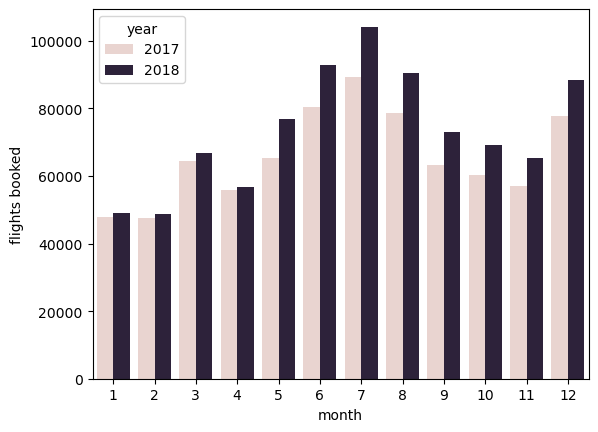

In [59]:
sns.barplot(data=vuelos_por_mes, x='month', y='flights booked',hue='year');

    - El gráfico nos muestras que, tanto en el 2017 como en el 2018, se reseron más vuelos en los meses 6,7 y 8 (verano en Norteamérica) y en el 12 (festividades), también muestra una pequeña subida en el mes 3. Además que el volumen de reservas aumento en el 2018.


2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


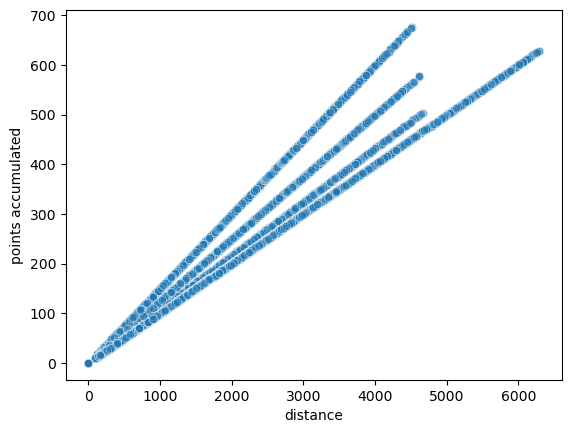

In [64]:
sns.scatterplot(data=df_u, x= 'distance', y= 'points accumulated', alpha=0.5);

Según el gráfico, si existe relación entra la distancia que vuelan los clientes y la cantidad de puntos acumulan. Hay multiples pendientes que se pueden deber a los diferentes niveles de loyalty cards.

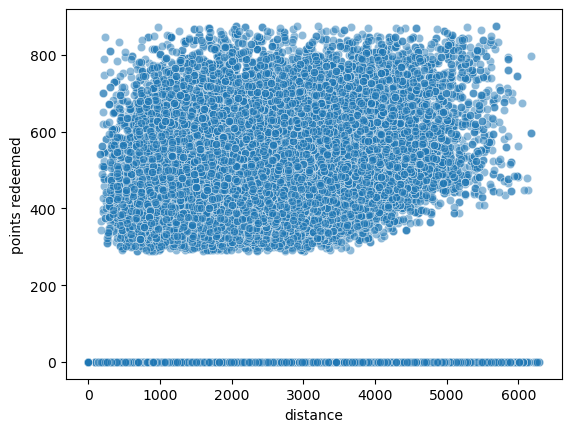

In [66]:
sns.scatterplot(data=df_u, x= 'distance', y= 'points redeemed', alpha=0.5);

Pero en este gráfico vemos que la gente acumula puntos pero nunca los canjea, lo que indica que la aerolínea necesita investigar qué es lo que impide el uso de los puntos

3. ¿Cuál es la distribución de los clientes por provincia o estado?

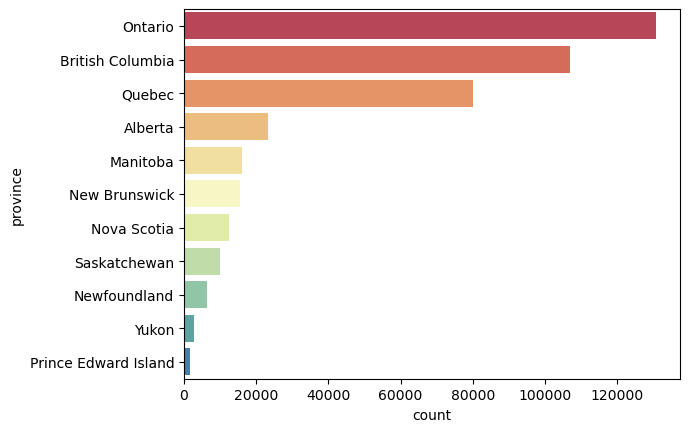

In [71]:
sns.countplot(data=df_u, y='province',order=df_u['province'].value_counts().index, palette='Spectral');

El gráfico nos muestra claramente que la mayoría de los clientes son de Ontario, seguido por British Columbia y Quebec luego.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [76]:
salario_medio = df_u.groupby('education')['salary'].mean().reset_index()

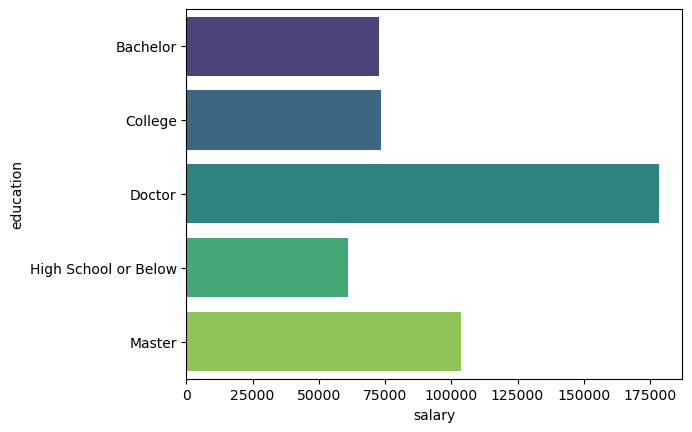

In [80]:
sns.barplot(data=salario_medio, y='education', x= 'salary',palette='viridis');

El gráfico nos muestra que, cuanto mayor es el nivel educativo de nuestros clientes, mayor  es el salario.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 


In [84]:
# frecuencia de cada tarjeta
conteo_tarjetas = df_u['loyalty card'].value_counts()

#calcular el porcentaje 
proporcion_tarjetas = conteo_tarjetas / conteo_tarjetas.sum() * 100

proporcion_tarjetas

loyalty card
Star      45.417431
Nova      33.915153
Aurora    20.667416
Name: count, dtype: float64

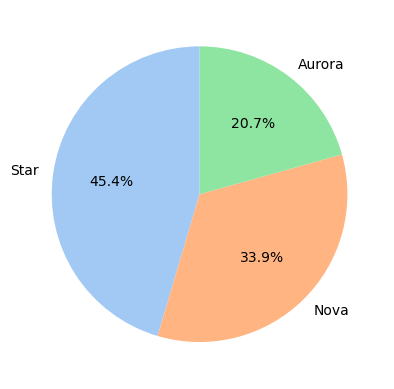

In [83]:
plt.pie(proporcion_tarjetas, labels=proporcion_tarjetas.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'));

Casi la mitad de los clientes tienen la tarjeta 'STAR' y solo el 20% la 'NOVA'. Las tarjetas están relacionadas con el CLV (Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella). Esto último se muestra en el gráfico de abajo.

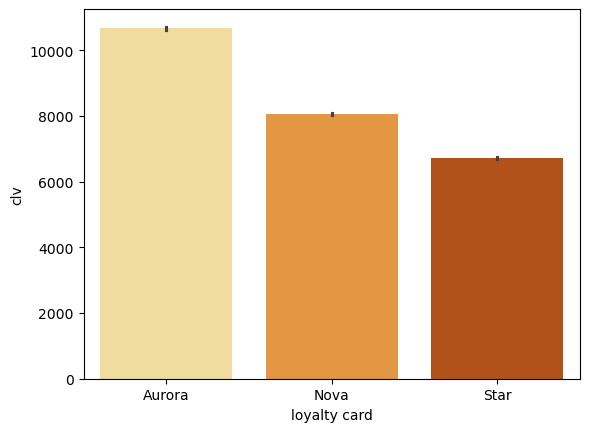

In [99]:
sns.barplot(data=df_u, x='loyalty card', y='clv', palette='YlOrBr');

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

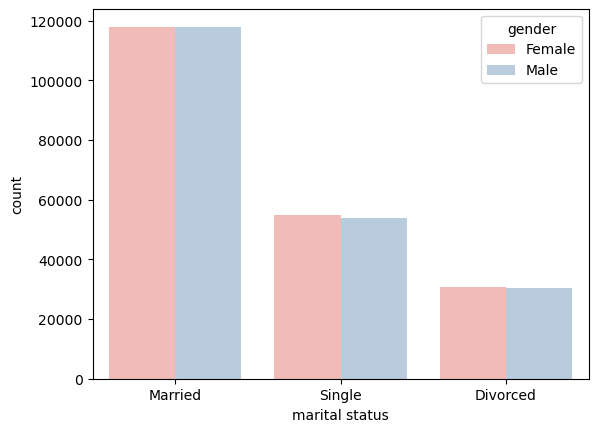

In [101]:
sns.countplot(data=df_u, x='marital status', hue='gender', palette='Pastel1');

Tanto hombres como mujeres, la mayoría de nuestros clientes son casados.

In [103]:
df_u.to_csv('files/customer_loyalty_cleaned.csv')